In [139]:
import torch
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from torch import nn

In [140]:
torch.__version__

'2.4.0+rocm6.3.2'

In [141]:
weight = 0.7
bias= 0.3
start = 0
end = 1
step = 0.02
X = torch.arange(start, end, step).unsqueeze(1)
y = weight * X + bias

In [142]:
X[:10], y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

In [143]:
len(X), len(y)

(50, 50)

In [144]:
X.shape, y.shape

(torch.Size([50, 1]), torch.Size([50, 1]))

In [145]:
train_split = int(0.8 * len(X))
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

In [146]:
len(X_train), len(y_train), len(X_test), len(y_test)

(40, 40, 10, 10)

In [147]:
def plot_prediction(train_data = X_train, train_labels = y_train, test_data = X_test, test_labels = y_test, predictions = None):
    plt.figure(figsize=(10, 6))
    plt.scatter(train_data, train_labels, c="b", s=4, label='Training data')
    plt.scatter(test_data, test_labels, c="g", s=4, label='Testing data')
    if predictions is not None:
        plt.scatter(test_data, predictions, c="r", s=4, label='Predictions')
    plt.legend()
    plt.show()

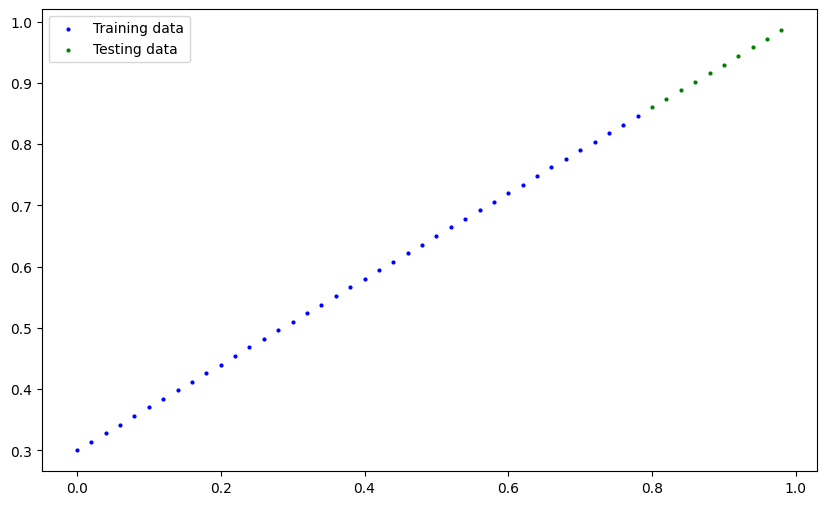

In [148]:
plot_prediction()

In [149]:
class LinearRegression(nn.Module):
    def __init__(self):
        super().__init__()
        self.weight = nn.Parameter(torch.randn(1, dtype=torch.float))
        self.bias = nn.Parameter(torch.randn(1, dtype=torch.float))
    
    def forward(self, x: torch.Tensor) -> torch.Tensor:
        return self.weight * x + self.bias

In [150]:
model_0 = LinearRegression()

list(model_0.parameters())

[Parameter containing:
 tensor([1.6846], requires_grad=True),
 Parameter containing:
 tensor([-1.3446], requires_grad=True)]

In [151]:
model_0.state_dict()

OrderedDict([('weight', tensor([1.6846])), ('bias', tensor([-1.3446]))])

In [152]:
X_test, y_test

(tensor([[0.8000],
         [0.8200],
         [0.8400],
         [0.8600],
         [0.8800],
         [0.9000],
         [0.9200],
         [0.9400],
         [0.9600],
         [0.9800]]),
 tensor([[0.8600],
         [0.8740],
         [0.8880],
         [0.9020],
         [0.9160],
         [0.9300],
         [0.9440],
         [0.9580],
         [0.9720],
         [0.9860]]))

In [153]:
with torch.inference_mode():
    y_preds = model_0(X_test)

y_preds

tensor([[0.0030],
        [0.0367],
        [0.0704],
        [0.1041],
        [0.1378],
        [0.1715],
        [0.2052],
        [0.2389],
        [0.2725],
        [0.3062]])

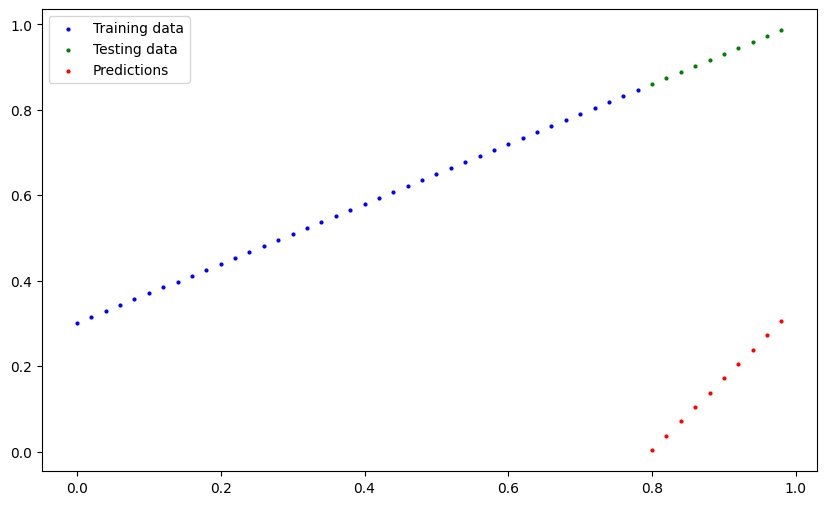

In [154]:
plot_prediction(predictions=y_preds)

In [155]:
list(model_0.parameters()), model_0.state_dict()

([Parameter containing:
  tensor([1.6846], requires_grad=True),
  Parameter containing:
  tensor([-1.3446], requires_grad=True)],
 OrderedDict([('weight', tensor([1.6846])), ('bias', tensor([-1.3446]))]))

In [156]:
loss_fn = nn.L1Loss()
optimizer = torch.optim.SGD(model_0.parameters(), lr=1e-2)


In [157]:
epochs = 1000

epochCount = []
lossValues = []
testLossValues = []

for epoch in range(epochs):
    model_0.train()

    y_pred = model_0(X_train)

    loss = loss_fn(y_pred, y_train)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    model_0.eval()
    with torch.inference_mode():
        test_pred = model_0(X_test)
        test_loss = loss_fn(test_pred, y_test)

    if epoch % 50 == 0:
        epochCount.append(epoch)
        lossValues.append(loss.item())
        testLossValues.append(test_loss.item())
        print(f"Epoch {epoch}, Loss {loss.item()}, Test Loss {test_loss.item()}\n")
        print(model_0.state_dict())

Epoch 0, Loss 1.260650873184204, Test Loss 0.7549001574516296

OrderedDict({'weight': tensor([1.6885]), 'bias': tensor([-1.3346])})
Epoch 50, Loss 0.6846003532409668, Test Loss 0.08667977154254913

OrderedDict({'weight': tensor([1.8835]), 'bias': tensor([-0.8346])})
Epoch 100, Loss 0.31584516167640686, Test Loss 0.4142538011074066

OrderedDict({'weight': tensor([2.0010]), 'bias': tensor([-0.4436])})
Epoch 150, Loss 0.26393240690231323, Test Loss 0.5358620882034302

OrderedDict({'weight': tensor([1.9691]), 'bias': tensor([-0.2936])})
Epoch 200, Loss 0.24324139952659607, Test Loss 0.5443942546844482

OrderedDict({'weight': tensor([1.8989]), 'bias': tensor([-0.2226])})
Epoch 250, Loss 0.22560076415538788, Test Loss 0.5236387848854065

OrderedDict({'weight': tensor([1.8194]), 'bias': tensor([-0.1726])})
Epoch 300, Loss 0.20835593342781067, Test Loss 0.4863990247249603

OrderedDict({'weight': tensor([1.7349]), 'bias': tensor([-0.1346])})
Epoch 350, Loss 0.19118386507034302, Test Loss 0.4464

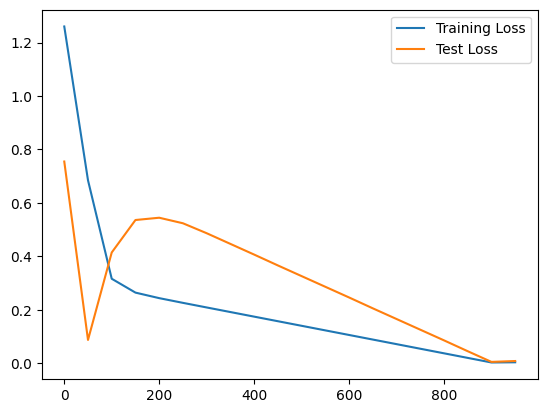

In [158]:
plt.plot(epochCount, lossValues, label='Training Loss')
plt.plot(epochCount, testLossValues, label='Test Loss')
plt.legend()
plt.show()

In [159]:
with torch.inference_mode():
    y_preds_new = model_0(X_test)

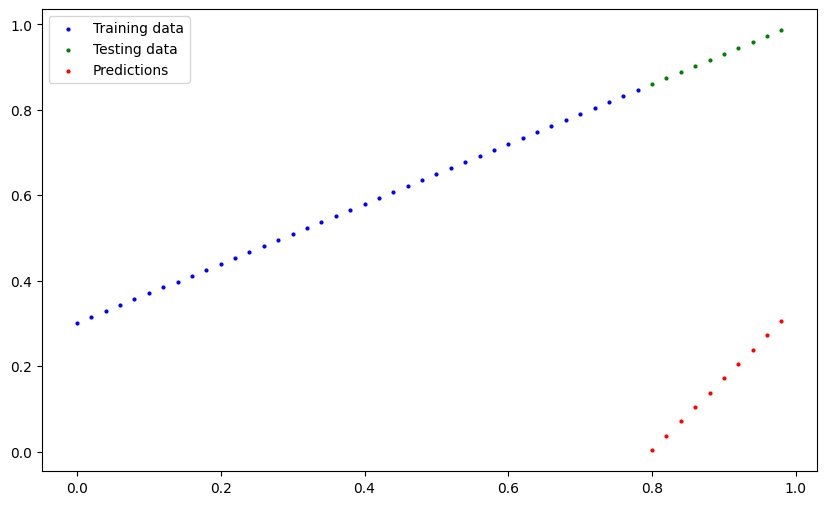

In [160]:
plot_prediction(predictions=y_preds)


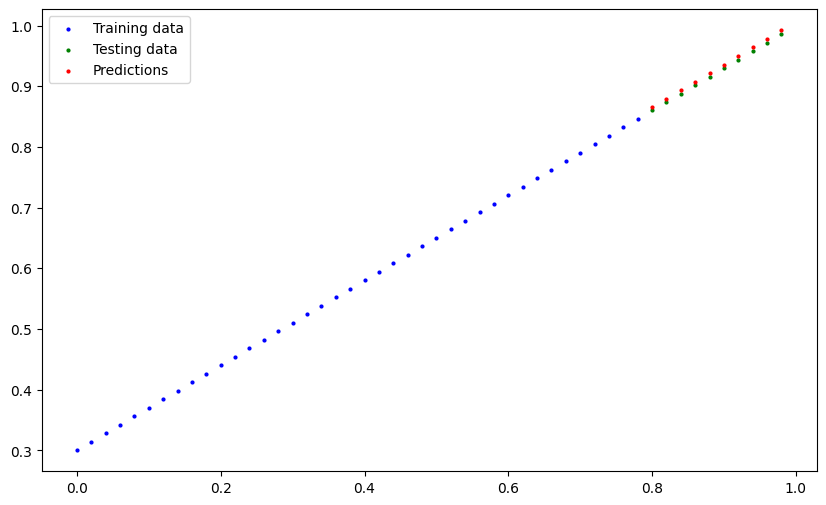

In [161]:
plot_prediction(predictions=y_preds_new)
